In [1]:
import pandas as pd
import numpy as np
import bilby
import corner

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyanadupletsa/Documents/PhDThesisPlots/matplotlibrc')

mpl.rc('xtick', labelsize = 16) 
mpl.rc('ytick', labelsize = 16)

In [3]:
my_color = '#97a7a7'
my_color_darker = '#2f4f4f'
my_color2 = '#eba75f'
my_color2_darker = '#f6b26b'

In [4]:
def from_mChirp_q_to_m1_m2(mChirp, q):
    """
    Compute the transformation from mChirp, q to m1, m2
    """
    m1 = mChirp * (1 + q)**(1/5) * q**(-3/5)
    m2 = mChirp * (1 + q)**(1/5) * q**(2/5)
    return m1, m2

In [22]:
N = 100_000 # number of samples
# start with a uniform distribution in mChirp and q
mChirp = np.random.uniform(20, 30, N)
q = np.random.uniform(0.05, 0.99, N)

In [23]:
# distribution in the m1-m2 plane with a uniform distribution in mChirp and q
m1_uniform_in_Mc_q, m2_uniform_in_Mc_q = from_mChirp_q_to_m1_m2(mChirp, q)

In [24]:
mass_prior = (q**(-6/5)*mChirp*(1+q)**(2/5)) # jacobian from m1, m2 to mChirp, q
weights = mass_prior/mass_prior.sum()
index = np.random.choice(np.arange(N), size = N, replace = True, p = weights)
posteriors_mChirp = mChirp[index]
posteriors_q = q[index]

# distribution in the m1-m2 plane after the reweighting
# with a uniform in component masses prior
m1_uniform_in_m1m2, m2_uniform_in_m1m2 = from_mChirp_q_to_m1_m2(posteriors_mChirp, posteriors_q)

In [25]:
my_fontsize=18

/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_46162/2964510841.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend(title='Uniform in $\mathcal{M}$, $q$', title_fontsize=my_fontsize, frameon=False, loc='upper center')
/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_46162/2964510841.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend(title='Uniform in $m_1$, $m_2$', title_fontsize=my_fontsize, frameon=False, loc='upper center')


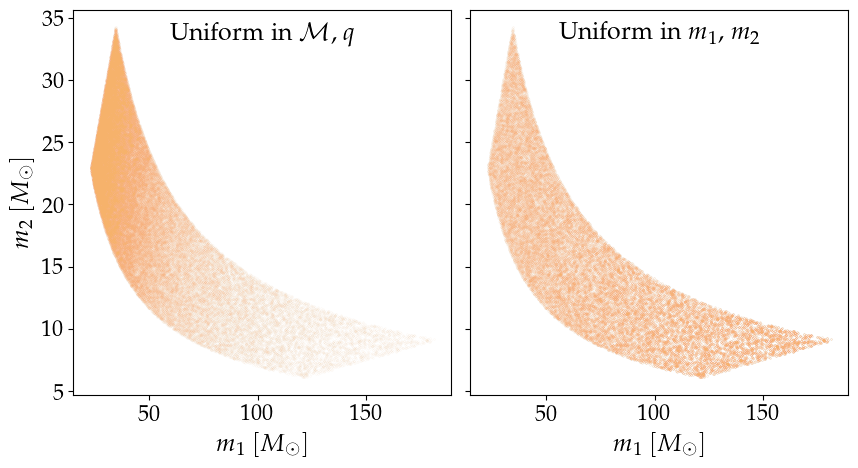

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
ax[0].scatter(m1_uniform_in_Mc_q, m2_uniform_in_Mc_q, s=0.001, color=my_color2_darker)
ax[0].set_xlabel(r'$m_1$ $[M_{\odot}]$', fontsize=my_fontsize)
ax[0].set_ylabel(r'$m_2$ $[M_{\odot}]$', fontsize=my_fontsize)
ax[0].legend(title='Uniform in $\mathcal{M}$, $q$', title_fontsize=my_fontsize, frameon=False, loc='upper center')

ax[1].scatter(m1_uniform_in_m1m2, m2_uniform_in_m1m2, s=0.001, color=my_color2_darker)
ax[1].set_xlabel(r'$m_1$ $[M_{\odot}]$', fontsize=my_fontsize)
ax[1].legend(title='Uniform in $m_1$, $m_2$', title_fontsize=my_fontsize, frameon=False, loc='upper center')

plt.subplots_adjust(wspace=0.05, 
                    hspace=0)
plt.savefig('plots/mass_distributions_m1m2.png', bbox_inches='tight', dpi=600)
plt.show()

/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_46162/1420803552.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend(title='Uniform in $\mathcal{M}$, $q$', title_fontsize=my_fontsize, frameon=False, loc='upper center')
/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_46162/1420803552.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend(title='Uniform in $m_1$, $m_2$', title_fontsize=my_fontsize, frameon=False, loc='upper center')


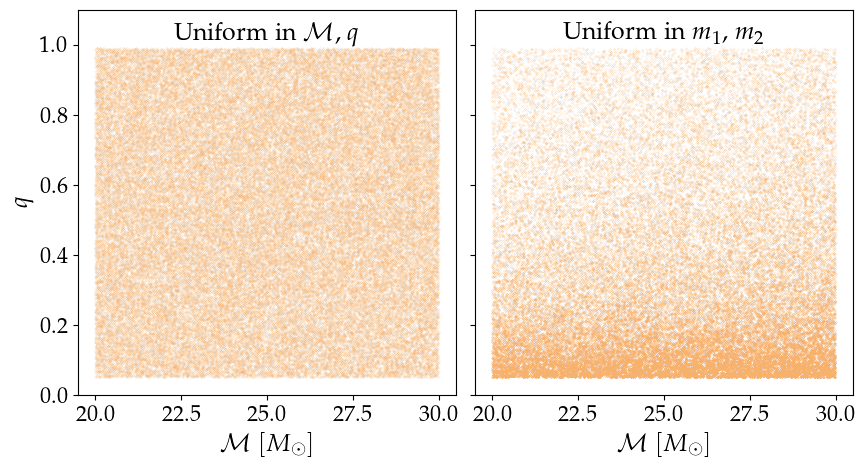

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
ax[0].scatter(mChirp, q, s=0.01, color=my_color2_darker)
ax[0].set_xlabel(r'$\mathcal{M}$ $[M_{\odot}]$', fontsize=my_fontsize)
ax[0].set_ylabel(r'$q$', fontsize=my_fontsize)
ax[0].set_ylim(0,1.1)
ax[0].legend(title='Uniform in $\mathcal{M}$, $q$', title_fontsize=my_fontsize, frameon=False, loc='upper center')

ax[1].scatter(posteriors_mChirp, posteriors_q, s=0.01, color=my_color2_darker)
ax[1].set_xlabel(r'$\mathcal{M}$ $[M_{\odot}]$', fontsize=my_fontsize)
ax[1].set_ylim(0,1.1)
ax[1].legend(title='Uniform in $m_1$, $m_2$', title_fontsize=my_fontsize, frameon=False, loc='upper center')

plt.subplots_adjust(wspace=0.05, 
                    hspace=0.)
plt.savefig('plots/mass_distributions_mChirpq.png', bbox_inches='tight', dpi=600)
plt.show()